In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import ssl
import os

In [2]:
# ✅ Fix SSL certificate verification issue
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# ✅ Updated data path (no train/val/test directories; direct class folders under 'Body Parts')
data_dir = 'Body Parts/Tongue'  # Example: 'Body Parts/Eye', 'Body Parts/Face', etc.


In [4]:
# Image dimensions and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [5]:
# ✅ Data augmentation and data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # ✅ Split data into 80% train and 20% validation
)


In [6]:
# ✅ Generator function
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 58 images belonging to 4 classes.
Found 13 images belonging to 4 classes.


In [7]:
# ✅ Debugging: Verify classes
print("Classes found:", train_generator.class_indices)
num_classes = train_generator.num_classes
print(f"Number of classes detected: {num_classes}")

Classes found: {'Magenta Coloured Tongue': 0, 'Not Visible': 1, 'Swollen Red ': 2, 'White Tongue': 3}
Number of classes detected: 4


In [8]:
# ✅ Build VGG16 model
def build_vgg16_model(num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [9]:
# ✅ Callbacks to save the model
def get_callbacks(model_name):
    return [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(filepath=f'{model_name}_saved_model_Tongue', save_format='tf', monitor='val_loss', save_best_only=True)  # ✅ TensorFlow SavedModel format
    ]


In [10]:
# ✅ Training function
def train_model(model, model_name):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(
        train_generator,
        epochs=20,
        validation_data=val_generator,
        callbacks=get_callbacks(model_name)
    )

    # ✅ Save final model in TensorFlow SavedModel format
    model_save_path = f'{model_name}_final_saved_model'
    model.save(model_save_path, save_format='tf')
    print(f"✅ Final model saved at: {model_save_path}")
    return history

In [11]:
# ✅ Build and train VGG16 model
print("Building and training VGG16 model...")
model = build_vgg16_model(num_classes)
history = train_model(model, 'BodyParts_VGG16')

Building and training VGG16 model...
Epoch 1/20
2/2 [==============================] - ETA: 0s - loss: 1.6189 - accuracy: 0.2586INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


2/2 [==============================] - 9s 6s/step - loss: 1.6189 - accuracy: 0.2586 - val_loss: 1.2572 - val_accuracy: 0.4615
Epoch 2/20
2/2 [==============================] - 8s 5s/step - loss: 1.3527 - accuracy: 0.3966 - val_loss: 1.3000 - val_accuracy: 0.3077
Epoch 3/20
2/2 [==============================] - 7s 5s/step - loss: 1.4007 - accuracy: 0.3276 - val_loss: 1.2667 - val_accuracy: 0.4615
Epoch 4/20
2/2 [==============================] - ETA: 0s - loss: 1.3975 - accuracy: 0.4138INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


2/2 [==============================] - 8s 5s/step - loss: 1.3975 - accuracy: 0.4138 - val_loss: 1.2051 - val_accuracy: 0.6154
Epoch 5/20
2/2 [==============================] - ETA: 0s - loss: 1.4112 - accuracy: 0.3966INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


2/2 [==============================] - 8s 6s/step - loss: 1.4112 - accuracy: 0.3966 - val_loss: 1.1962 - val_accuracy: 0.6154
Epoch 6/20
2/2 [==============================] - ETA: 0s - loss: 1.2852 - accuracy: 0.3448INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


2/2 [==============================] - 8s 5s/step - loss: 1.2852 - accuracy: 0.3448 - val_loss: 1.1761 - val_accuracy: 0.5385
Epoch 7/20
2/2 [==============================] - ETA: 0s - loss: 1.2489 - accuracy: 0.4655INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


2/2 [==============================] - 8s 6s/step - loss: 1.2489 - accuracy: 0.4655 - val_loss: 1.1168 - val_accuracy: 0.6923
Epoch 8/20
2/2 [==============================] - 8s 5s/step - loss: 1.2472 - accuracy: 0.3793 - val_loss: 1.1281 - val_accuracy: 0.6154
Epoch 9/20
2/2 [==============================] - ETA: 0s - loss: 1.0959 - accuracy: 0.5000INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


2/2 [==============================] - 8s 5s/step - loss: 1.0959 - accuracy: 0.5000 - val_loss: 1.1113 - val_accuracy: 0.6154
Epoch 10/20
2/2 [==============================] - ETA: 0s - loss: 1.1244 - accuracy: 0.4655INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


2/2 [==============================] - 9s 6s/step - loss: 1.1244 - accuracy: 0.4655 - val_loss: 1.0324 - val_accuracy: 0.6154
Epoch 11/20
2/2 [==============================] - 8s 5s/step - loss: 1.1241 - accuracy: 0.5345 - val_loss: 1.0765 - val_accuracy: 0.5385
Epoch 12/20
2/2 [==============================] - 8s 5s/step - loss: 1.0994 - accuracy: 0.5345 - val_loss: 1.0769 - val_accuracy: 0.6154
Epoch 13/20
2/2 [==============================] - ETA: 0s - loss: 1.0295 - accuracy: 0.5345INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


2/2 [==============================] - 9s 5s/step - loss: 1.0295 - accuracy: 0.5345 - val_loss: 1.0010 - val_accuracy: 0.6154
Epoch 14/20
2/2 [==============================] - 8s 5s/step - loss: 1.0678 - accuracy: 0.5690 - val_loss: 1.0317 - val_accuracy: 0.5385
Epoch 15/20
2/2 [==============================] - 9s 4s/step - loss: 1.0301 - accuracy: 0.5517 - val_loss: 1.0114 - val_accuracy: 0.6154
Epoch 16/20
2/2 [==============================] - 8s 5s/step - loss: 0.9516 - accuracy: 0.6379 - val_loss: 1.0237 - val_accuracy: 0.6154
Epoch 17/20
2/2 [==============================] - 8s 5s/step - loss: 0.9454 - accuracy: 0.5690 - val_loss: 1.0025 - val_accuracy: 0.6154
Epoch 18/20
2/2 [==============================] - ETA: 0s - loss: 0.9532 - accuracy: 0.5517INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


2/2 [==============================] - 9s 5s/step - loss: 0.9532 - accuracy: 0.5517 - val_loss: 0.9445 - val_accuracy: 0.6154
Epoch 19/20
2/2 [==============================] - ETA: 0s - loss: 0.9050 - accuracy: 0.7241INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Tongue/assets


2/2 [==============================] - 10s 6s/step - loss: 0.9050 - accuracy: 0.7241 - val_loss: 0.9268 - val_accuracy: 0.6923
Epoch 20/20
2/2 [==============================] - 8s 5s/step - loss: 1.0225 - accuracy: 0.5690 - val_loss: 0.9860 - val_accuracy: 0.6154
INFO:tensorflow:Assets written to: BodyParts_VGG16_final_saved_model/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_final_saved_model/assets


✅ Final model saved at: BodyParts_VGG16_final_saved_model


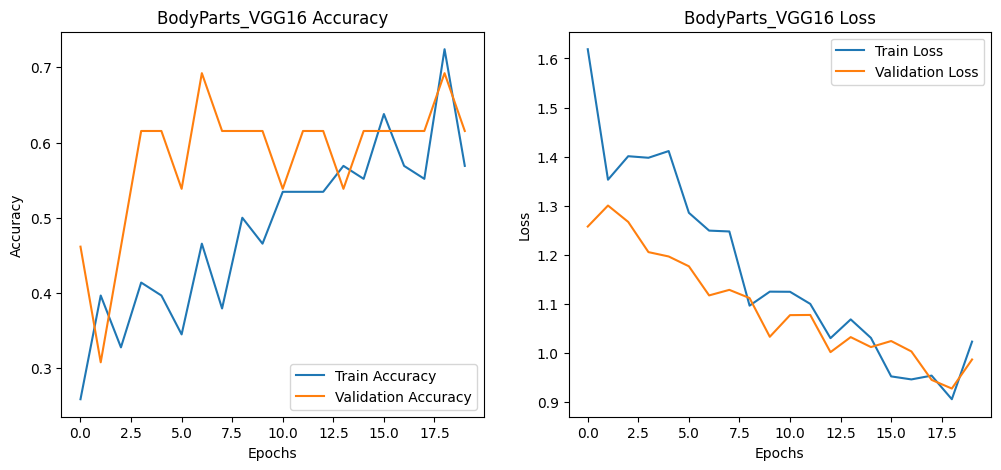

In [12]:
# ✅ Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history, 'BodyParts_VGG16')


In [13]:
# Save final models in TensorFlow SavedModel format
model.save('Tongue_model')  

INFO:tensorflow:Assets written to: Tongue_model/assets


INFO:tensorflow:Assets written to: Tongue_model/assets
